<a href="https://colab.research.google.com/github/Shewitte/Sentiment-Analysis-for-Amharic-Language-using-Twitter-Dataset/blob/main/lstmcopy_of_meme_lstm_best_with_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
pip install numpy pandas tensorflow keras matplotlib nltk

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout


In [37]:
import pandas as pd # Import the pandas library and alias it as 'pd'

data = pd.read_csv('/content/ameharic meme1.csv')

In [38]:
print(data.head())

  Image ID                                               text     label
0  Image_1  ሰላም FB ሳትጠቀም ኮሜንት ታነባለ ፍናን ደብዳቤ ሳታነብ የፍቅር መሆኑን...   neutral
1  Image_2  ከ ፍናን የምትበልጥ ቆንጆ አርቲስት ካሳየኸኝ ኢትዮጵያ የሚለውን የ ሀጫሉ...   neutral
2  Image_3  እቺ ልጅ በርገር ብትበላ ዳናይትን ፈስታ ሰላም ተስፋዬን አርታ ቤቲን ታስ...  negative
3  Image_4  የለበሰው ልብስ እና ጫማ ተበትኖ ድጋሚ ቢሰፋ ሙሉ የኢትዮጵያን ህዝብ አል...   neutral
4  Image_5                       ይሔ ልጅ ግን ሀቂቃን ዛሬ ነው እንዴ የሰማው   neutral


In [39]:
!pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences # Changed import to use tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer # Changed import to use tensorflow.keras

In [40]:
data['cleaned_text'] = data['text'].astype(str).apply(lambda x: x.lower() if pd.notna(x) else x)

In [41]:
import pandas as pd # Import the pandas library and alias it as 'pd'
from tensorflow.keras.preprocessing.text import Tokenizer # Changed import to use tensorflow.keras
from tensorflow.keras.utils import pad_sequences # Changed import to use tensorflow.keras.utils

data = pd.read_csv('/content/ameharic meme1.csv')
data['cleaned_text'] = data['text'].astype(str).apply(lambda x: x.lower() if pd.notna(x) else x)

max_length = 100  # Maximum number of words in a sequence

# 1. Create a Tokenizer instance
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>') # You can adjust num_words

# 2. Fit the tokenizer on your text data
tokenizer.fit_on_texts(data['cleaned_text'])

# 3. Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(data['cleaned_text'])

# 4. Call pad_sequences using the created sequences
X = pad_sequences(sequences, maxlen=max_length)

In [42]:
print("Unique labels before encoding:", data['label'].unique())

Unique labels before encoding: ['neutral' 'negative' 'Postive']


In [43]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])

In [44]:
# ipython-input-2-2eb53259242a
from sklearn.preprocessing import LabelEncoder # Importing LabelEncoder here
from sklearn.model_selection import train_test_split # Importing train_test_split



In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [47]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout


In [48]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
model.add(LSTM(64, return_sequences=True))

model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [49]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.9607 - loss: 0.1187 - val_accuracy: 0.8427 - val_loss: 0.6222
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.9670 - loss: 0.0960 - val_accuracy: 0.8357 - val_loss: 0.5948
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.9724 - loss: 0.0815 - val_accuracy: 0.8427 - val_loss: 0.6141
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9703 - loss: 0.1031 - val_accuracy: 0.8392 - val_loss: 0.6703
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - accuracy: 0.9689 - loss: 0.0977 - val_accuracy: 0.8462 - val_loss: 0.6598
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.9695 - loss: 0.0942 - val_accuracy: 0.8392 - val_loss: 0.6810
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.9768 - loss: 0.0784 - val_accuracy: 0.8427 - val_loss: 0.6868
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.9660 - loss: 0.1013 - val_accu

In [54]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8229 - loss: 0.9049
Test Accuracy: 84.62%


In [38]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8381 - loss: 0.6630
Validation Accuracy: 85.31%


In [39]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Changed to use y_pred
y_true_classes = y_test  # y_test is already the true labels (1D array)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


In [40]:
from sklearn.metrics import accuracy_score # Import accuracy_score
from sklearn.metrics import classification_report # Import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test

print("Accuracy:", accuracy_score(y_true_classes, y_pred_classes))
print(classification_report(y_true_classes, y_pred_classes, target_names=data['label'].unique()))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Accuracy: 0.8531468531468531
              precision    recall  f1-score   support

     neutral       0.91      0.87      0.89       110
    negative       0.83      0.84      0.83        74
     Postive       0.81      0.84      0.83       102

    accuracy                           0.85       286
   macro avg       0.85      0.85      0.85       286
weighted avg       0.85      0.85      0.85       286



In [41]:
from sklearn.metrics import confusion_matrix # Import confusion_matrix

confusion = confusion_matrix(y_test, y_test)


In [42]:
!pip install seaborn
import seaborn as sns # Importing seaborn library and creating alias 'sns'



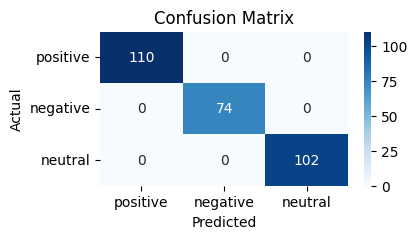

In [43]:
plt.figure(figsize=(4, 2))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative','neutral'], yticklabels=['positive', 'negative','neutral'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report # Import classification_report
from sklearn.preprocessing import LabelEncoder



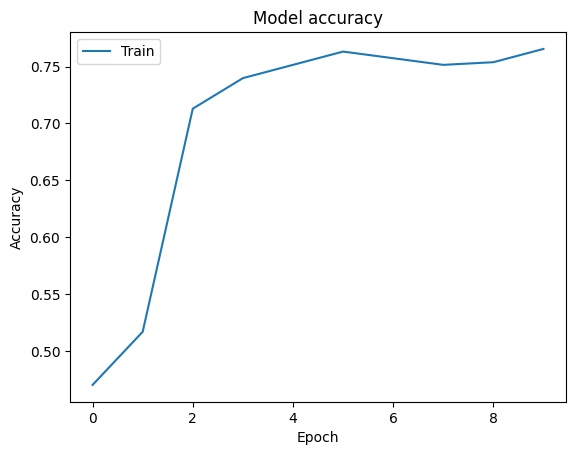

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
predicted_classes = model.predict(X_test)  # Replace X_test_pad with X_test
predicted_labels = np.argmax(predicted_classes, axis=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step


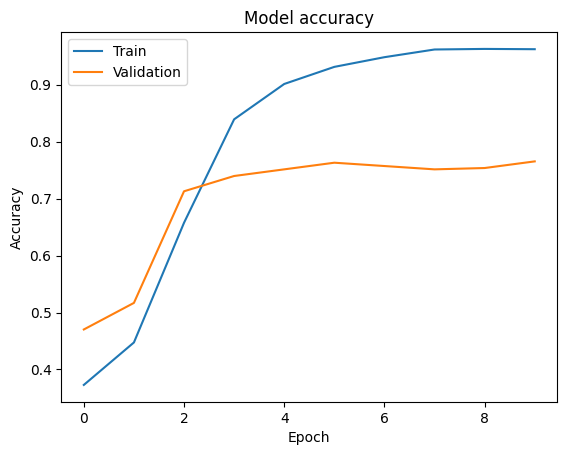

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

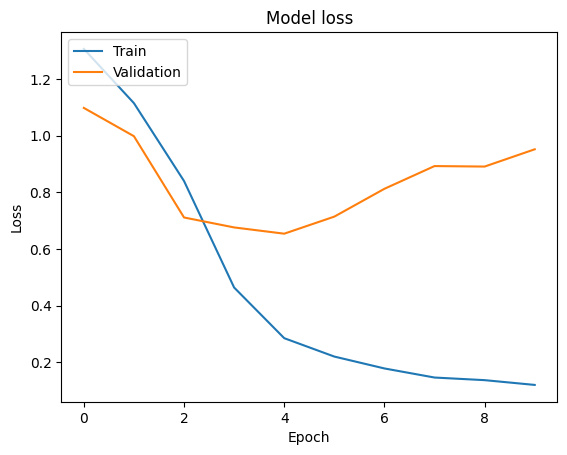

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()